In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from plotnine import *

In [2]:
df=pd.read_csv("E:/Data Science/dataset/LiBattDeg-master/LiBattDeg-master/data0505.csv")
df.head()

,SOC,SOH,Power,T,SEI_after,SEI_delta
0,80,1.0,-1.00000,23,1.000000e-08,-0.003660
1,80,1.0,-0.89474,23,1.000000e-08,-0.001314
2,80,1.0,-0.78947,23,1.000000e-08,0.004721
3,80,1.0,-0.68421,23,1.000000e-08,-0.001936
4,80,1.0,-0.57895,23,1.000000e-08,0.003147


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12200 entries, 0 to 12199
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SOC        12200 non-null  int64  
 1   SOH        12200 non-null  float64
 2   Power      12200 non-null  float64
 3   T          12200 non-null  int64  
 4   SEI_after  12171 non-null  float64
 5   SEI_delta  12171 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 572.0 KB


In [4]:
df.isnull().sum()

SOC           0
SOH           0
Power         0
T             0
SEI_after    29
SEI_delta    29
dtype: int64

In [5]:
df_na=df.isna()
df[df_na.any(axis=1)]

,SOC,SOH,Power,T,SEI_after,SEI_delta
565,78,1.8889,-0.473680,23,NaN,NaN
1943,71,1.7778,-0.684210,23,NaN,NaN
4160,60,1.8889,-1.000000,23,NaN,NaN
4161,60,1.8889,-0.894740,23,NaN,NaN
4162,60,1.8889,-0.789470,23,NaN,NaN
4163,60,1.8889,-0.684210,23,NaN,NaN
4164,60,1.8889,-0.578950,23,NaN,NaN
4165,60,1.8889,-0.473680,23,NaN,NaN
4166,60,1.8889,-0.368420,23,NaN,NaN
4167,60,1.8889,-0.263160,23,NaN,NaN


In [6]:
df=df.dropna()

In [7]:
df.isnull().sum()

SOC          0
SOH          0
Power        0
T            0
SEI_after    0
SEI_delta    0
dtype: int64

In [8]:
df=df[df["Power"]>=0]
df=df[df["SOH"]>=0]
df=df[df["Power"]>=0]
df=df[df["SEI_after"]>=0]

# Univariate Analysis

In [9]:
df.describe()

,SOC,SOH,Power,T,SEI_after,SEI_delta
count,6090.000000,6090.000000,6090.000000,6090.0,6.090000e+03,6090.000000
mean,49.983580,1.499361,0.526315,23.0,1.499362e-08,49.593897
std,17.618045,0.319052,0.302371,0.0,3.190525e-09,3.351310
min,20.000000,1.000000,0.052632,23.0,1.000000e-08,43.859380
25%,35.000000,1.222200,0.263160,23.0,1.222200e-08,46.646938
50%,50.000000,1.444400,0.526315,23.0,1.444401e-08,49.598050
75%,65.000000,1.777800,0.789470,23.0,1.777800e-08,52.429150
max,80.000000,2.000000,1.000000,23.0,2.000001e-08,59.041066


C:\Users\Jeffery\anaconda3\envs\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
C:\Users\Jeffery\anaconda3\envs\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
C:\Users\Jeffery\anaconda3\envs\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function f

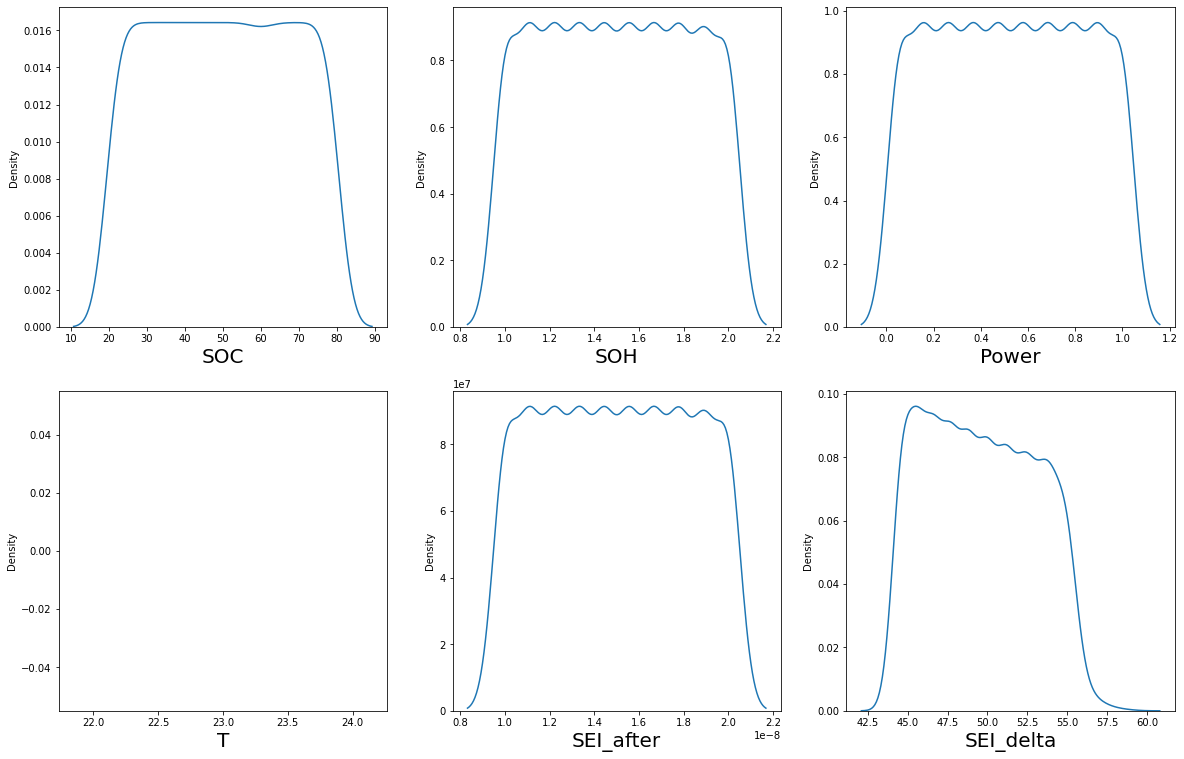

In [10]:
plt.figure(figsize=(20,20),facecolor="white")
plotnumber=1

for col in df:
    if plotnumber<=6:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[col],hist=False)
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.show()     

In [11]:
##1 the SOC column in the data states that the data is uniformly distributed and that it ranges from 20 to 80 
##2 the SOH column in the data states that the data is comb like or has a wave like distribtion and it ranges from 1 to 2
##3 the Power columnn in the data states that the data is uniformly distribued and that the values ranges from -1 to +1 
##4 the SEI delta column in the data states that the data has a bimodel distibution and the value varies from

<AxesSubplot:>

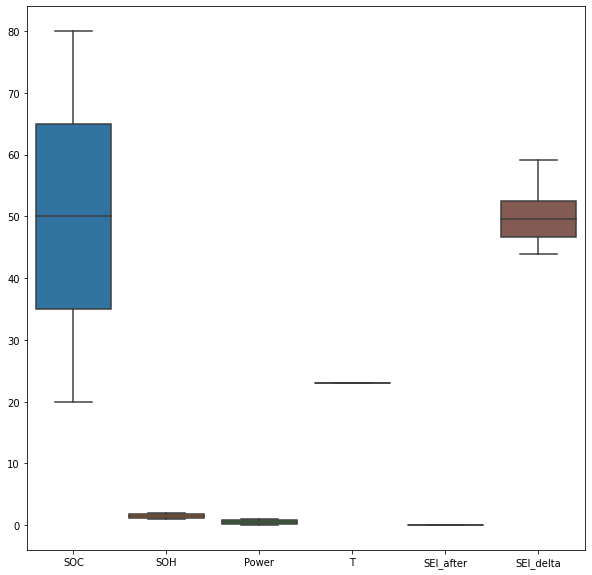

In [12]:
fig=plt.subplots(figsize=(10,10))
sns.boxplot(data=df)

In [13]:
## the boxplot in the data refers that there is no outliers in the dataset  

# Bivariant Analysis

In [14]:
df.corr()

,SOC,SOH,Power,T,SEI_after,SEI_delta
SOC,1.000000e+00,-1.138111e-03,9.315175e-17,NaN,-1.138108e-03,0.030039
SOH,-1.138111e-03,1.000000e+00,2.041203e-17,NaN,1.000000e+00,-0.067941
Power,9.315175e-17,2.041203e-17,1.000000e+00,NaN,1.042313e-07,0.992306
T,NaN,NaN,NaN,NaN,NaN,NaN
SEI_after,-1.138108e-03,1.000000e+00,1.042313e-07,NaN,1.000000e+00,-0.067941
SEI_delta,3.003908e-02,-6.794132e-02,9.923060e-01,NaN,-6.794122e-02,1.000000


<AxesSubplot:>

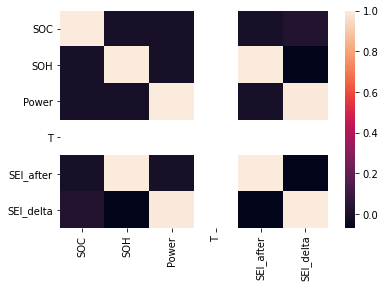

In [15]:
sns.heatmap(df.corr())

In [16]:
df.drop("T",axis=1,inplace=True)

In [17]:
df.drop("SEI_after",axis=1,inplace=True)

In [18]:
df

,SOC,SOH,Power,SEI_delta
10,80,1.0,0.052632,44.877633
11,80,1.0,0.157890,46.189571
12,80,1.0,0.263160,47.560540
13,80,1.0,0.368420,48.999841
14,80,1.0,0.473680,50.481875
...,...,...,...,...
12195,20,2.0,0.578950,49.896804
12196,20,2.0,0.684210,51.194378
12197,20,2.0,0.789470,52.520156
12198,20,2.0,0.894740,53.888671


In [19]:
X=df.iloc[:,0:3]
y=df.iloc[:,3]

<AxesSubplot:>

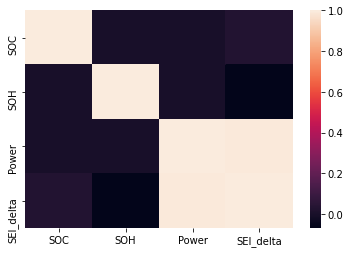

In [20]:
sns.heatmap(df.corr())

# Min-Max Scaler

In [21]:
scaling=MinMaxScaler()
X=scaling.fit_transform(X)

In [94]:
X

array([[1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.11110572],
       [1.        , 0.        , 0.2222241 ],
       ...,
       [0.        , 1.        , 0.77777379],
       [0.        , 1.        , 0.88889217],
       [0.        , 1.        , 1.        ]])

# Train Test Split

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=3)

# Linear Regression

In [23]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred=lr.predict(X_test)

In [25]:
y_pred

array([44.7062819 , 51.55586524, 53.13088399, ..., 47.81194177,
       46.29772331, 45.36188478])

In [26]:
lr.intercept_

44.57710746951502

In [27]:
lr.coef_

array([ 0.32889259, -0.70146633, 10.40594303])

In [28]:
lr.score(X_test,y_test)

0.9887570424375961

In [29]:
mean_squared_error(y_test,y_pred)

0.1249014294870659

In [30]:
r2_score(y_test,y_pred)

0.9887570424375961

C:\Users\Jeffery\anaconda3\envs\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='SOC', ylabel='SEI_delta'>

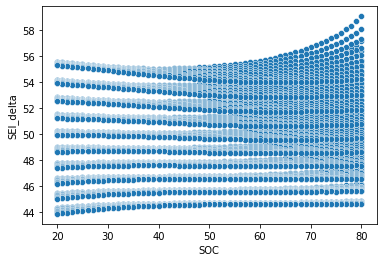

In [31]:
sns.scatterplot(df["SOC"],y)

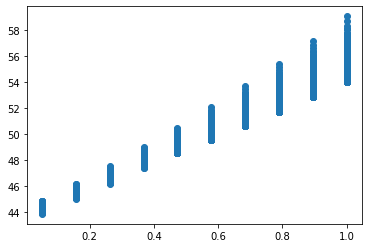

In [32]:
plt.scatter(df["Power"],y)

C:\Users\Jeffery\anaconda3\envs\python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


<AxesSubplot:xlabel='SOH', ylabel='SEI_delta'>

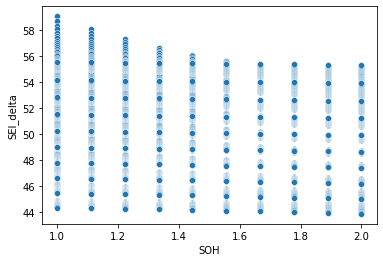

In [33]:
sns.scatterplot(df["SOH"],y)

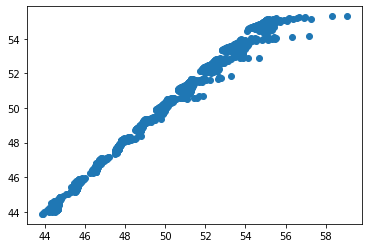

In [34]:
plt.scatter(y_test,lr.predict(X_test))

# LASSO CV

In [35]:
from sklearn.linear_model import LassoCV,RidgeCV,ElasticNetCV,Lasso,Ridge,ElasticNet

In [36]:
lasso=LassoCV(cv=10)

In [37]:
lasso.fit(X_train,y_train)

LassoCV(cv=10)

In [38]:
alpha=lasso.alpha_

In [39]:
lasso_reg=Lasso(alpha)

In [40]:
lasso_reg.fit(X_train,y_train)

Lasso(alpha=0.0010663413645908147)

In [41]:
lasso_reg.score(X_test,y_test)

0.988716981411233

# RidgeCV

In [42]:
ridge=RidgeCV(cv=10)

In [43]:
ridge.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=10)

In [44]:
alpha1=ridge.alpha_

In [45]:
ridge_reg=Ridge(alpha1)

In [46]:
ridge_reg.fit(X_train,y_train)

Ridge(alpha=0.1)

In [47]:
ridge_reg.score(X_test,y_test)

0.9887541985052445

# Elasticnet

In [48]:
el=ElasticNetCV(cv=10)

In [49]:
el.fit(X_train,y_train)

ElasticNetCV(cv=10)

In [50]:
alpha2=el.alpha_

In [51]:
elastic=ElasticNet(alpha2)

In [52]:
elastic.fit(X_train,y_train)

ElasticNet(alpha=0.00213268272918163)

In [53]:
elastic.score(X_test,y_test)

0.9884467182465042

# Saving model

In [55]:
import pickle 

In [ ]:
pickle.dump(lr,open("finalized_model.pickle",'wb'))

In [ ]:
pickle.dump(scaling,open('finalized_scaling.pickle',"wb"))

In [56]:
model_linear=pickle.load(open("finalized_model.pickle",'rb'))
model_minmax=pickle.load(open("finalized_scaling.pickle",'rb'))

In [57]:
a=model_minmax.transform([[80,1.0,0.473680]])

In [58]:
model_linear.predict(a)

array([49.53081481])